In [145]:
import numpy as np
import matplotlib.pyplot as plt

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
RMSE: 2946.634, interacao: 0
RMSE: 2648.238, interacao: 0
RMSE: 2381.174, interacao: 1
RMSE: 2142.151, interacao: 2
RMSE: 1928.226, interacao: 3
RMSE: 1736.763, interacao: 4
RMSE: 1565.404, interacao: 5
RMSE: 1412.038, interacao: 6
RMSE: 1274.775, interacao: 7
RMSE: 1151.925, interacao: 8
RMSE: 1041.974, interacao: 9
RMSE: 943.567, interacao: 10
RMSE: 855.494, interacao: 11
RMSE: 776.668, interacao: 12
RMSE: 706.119, interacao: 13
RMSE: 642.977, interacao: 14
RMSE: 586.466, interacao: 15
RMSE: 535.887, interacao: 16
RMSE: 490.620, interacao: 17
RMSE: 450.105, interacao: 18
RMSE: 413.845, interacao: 19
RMSE: 381.392, interacao: 20
RMSE: 352.346, interacao: 21
RMSE: 326.350, interacao: 22
RMSE: 303.083, interacao: 23
RMSE: 282.259, interacao: 24
RMSE: 263.622, interacao: 25
RMSE: 246.941, interacao: 26
RMSE: 232.012, interacao: 27
RMSE: 218.650, interacao: 28
RMSE: 206.691, interacao: 29
[[2.94663450e+03 0.0

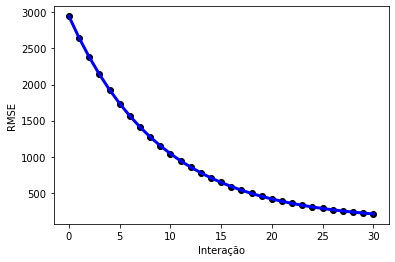

RMSE: 2648.238, iteracao: 30
RMSE: 2381.174, iteracao: 29
RMSE: 2142.151, iteracao: 28
RMSE: 1928.226, iteracao: 27
RMSE: 1736.763, iteracao: 26
RMSE: 1565.404, iteracao: 25
RMSE: 1412.038, iteracao: 24
RMSE: 1274.775, iteracao: 23
RMSE: 1151.925, iteracao: 22
RMSE: 1041.974, iteracao: 21
RMSE: 943.567, iteracao: 20
RMSE: 855.494, iteracao: 19
RMSE: 776.668, iteracao: 18
RMSE: 706.119, iteracao: 17
RMSE: 642.977, iteracao: 16
RMSE: 586.466, iteracao: 15
RMSE: 535.887, iteracao: 14
RMSE: 490.620, iteracao: 13
RMSE: 450.105, iteracao: 12
RMSE: 413.845, iteracao: 11
RMSE: 381.392, iteracao: 10
RMSE: 352.346, iteracao: 9
RMSE: 326.350, iteracao: 8
RMSE: 303.083, iteracao: 7
RMSE: 282.259, iteracao: 6
RMSE: 263.622, iteracao: 5
RMSE: 246.941, iteracao: 4
RMSE: 232.012, iteracao: 3
RMSE: 218.650, iteracao: 2
RMSE: 206.691, iteracao: 1
RMSE: 195.988, iteracao: 0
Critério de tolerância que é comparado à norma do gradiente [0.14662288265478626, 2.6600827047522477]
After 30 iterations b = 0.1450

In [146]:


import numpy as np
import matplotlib.pyplot as plt

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2    
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    RMSE = compute_error_for_line_given_points(b, m, points)
    array_rmse = np.array([[RMSE, 0]])
    print("RMSE: {:.3f}, interacao: {}".format(RMSE, 0))
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        RMSE = compute_error_for_line_given_points(b, m, points)
        # resposta da parte 1 da questão 1, imprimindo o RMSE para cada iteração
        print("RMSE: {:.3f}, interacao: {}".format(RMSE, i))
        # inicio = resposta da parte 2 da questão 1 - gráfico do RMSE por iteração
        iteration = i + 1
        array_item = np.array([RMSE, iteration])
        array_rmse = np.vstack([array_rmse, array_item]) 
    print_graf_rmse(array_rmse)
    # fim = resposta da parte 2 da questão 1 gráfico do RMSE por iteração
    return [b, m]

#resposta da questão 4
def gradient_norm(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    RMSE = compute_error_for_line_given_points(b, m, points)
    gradient_norm = np.array([[RMSE, 0]])
    while num_iterations >= 0:
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        RMSE = compute_error_for_line_given_points(b, m, points)
        # resposta da parte 1 da questão 1, imprimindo o RMSE para cada iteração
        print("RMSE: {:.3f}, iteracao: {}".format(RMSE, num_iterations))
        # inicio = resposta da parte 2 da questão 1 - gráfico do RMSE por iteração
        num_iterations = num_iterations - 1
        #iteration = i + 1
        array_item = np.array([RMSE, num_iterations])
        gradient_norm = np.vstack([gradient_norm, array_item]) 
    #print_graf_rmse(gradient_norm)
    return [b, m]

# método pra printar o gráfico da parte 2 da questão 1 - gráfico do RMSE por iteração
def print_graf_rmse(array_):
    print(array_)
    y, x = array_.T
    plt.scatter(x, y, color="black")
    plt.xlabel("Interação")
    plt.ylabel("RMSE")
    plt.plot(x, y, color="blue", linewidth=3)
    plt.show()

def run():
    points = np.genfromtxt("income.csv", delimiter=",")

    # testando valores de learning_rate para a segunda questão e registrar o RMSE
    #learning_rate_minimum = 0.00009
    #learning_rate_medium = 0.0001
    #learning_rate_maximum =0.0002
    #quando o valor do learning_rate aumenta, o erro diminui
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 30
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("Critério de tolerância que é comparado à norma do gradiente", gradient_norm(points, initial_b, initial_m, learning_rate, num_iterations))
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    #print("RMSE: ", compute_error_for_line_given_points(b, m, points))
if __name__ == '__main__':
    run()